In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('max_columns', None)

In [93]:
# Open calendar data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
seattle_calendar = pd.read_csv("seattle_airbnb_data/calendar.csv")
# Open listings data
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")
seattle_listings = pd.read_csv("seattle_airbnb_data/listings.csv")

In [94]:
# Concatenate the data calendar from Boston and Seattle
df_calendar = pd.concat([boston_calendar,seattle_calendar ], axis=0,ignore_index=True)
# Drop price column because we don't need it for our analysis
df_calendar = df_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
df_calendar = pd.concat([df_calendar.drop('available', axis=1), pd.get_dummies(df_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
df_occupation = df_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
df_occupation["occupation_percentage"] = df_occupation["available_f"]*100/(df_occupation["available_f"]+df_occupation["available_t"])
# Drop columns will no longer be used
df_occupation = df_occupation.drop(["available_f","available_t"], axis=1)
# Before concatenating listings dataframes, we need to remove the columns that have boston and not seattle
boston_listings = boston_listings.drop( ['access', 'interaction', 'house_rules'], axis=1)
# Concatenate the data listings from Boston and Seattle
df_listings = pd.concat([boston_listings, seattle_listings], axis=0)

In [128]:
# Create a consolidate dataframe with all the airbnb data including the ocupattion rate that wass alcasdflklasdf
df = pd.merge(df_listings, df_occupation,left_on="id",right_on="listing_id", how="inner")

In [129]:
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,occupation_percentage
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN,100.000000
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137DEFF0>]],
      dtype=object)

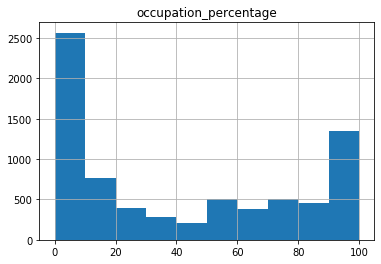

In [131]:
df.hist(column="occupation_percentage")

In [133]:
df_boston = df[df["city"]=="Boston"]
df_seattle = df[df["city"]=="Seattle"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16EEC330>]],
      dtype=object)

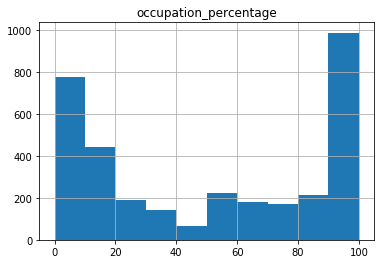

In [134]:
df_boston.hist(column="occupation_percentage")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14124A30>]],
      dtype=object)

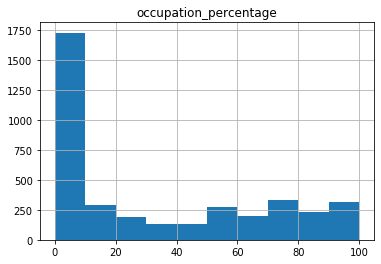

In [135]:
df_seattle.hist(column="occupation_percentage")

In [114]:
columns_of_interest = ['property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                       'bed_type','amenities','city']

df = df[columns_of_interest]


In [115]:
columns_of_interest = ['property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                       'bed_type']

df_boston = df_boston[columns_of_interest]
df_boston = df_boston.dropna()

In [116]:
df_boston

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed
2,Apartment,Private room,2,1.0,1.0,1.0,Real Bed
3,House,Private room,4,1.0,1.0,2.0,Real Bed
4,House,Private room,2,1.5,1.0,2.0,Real Bed
...,...,...,...,...,...,...,...
3533,House,Private room,4,1.0,1.0,2.0,Real Bed
3534,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed
3535,Apartment,Private room,2,1.0,1.0,1.0,Real Bed
3559,Boat,Private room,7,1.0,1.0,5.0,Real Bed


In [99]:
cat_vars = df_boston.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_boston = pd.concat([df_boston.drop(var, axis=1), pd.get_dummies(df_boston[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [101]:
df_boston

,occupation_percentage,accommodates,bathrooms,bedrooms,beds,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,100.000000,4,1.5,2.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1.643836,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,12.602740,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,73.150685,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,8.493151,2,1.5,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,100.000000,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3534,98.904110,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3535,100.000000,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3559,0.000000,7,1.0,1.0,5.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [103]:
#Split data into an X matrix and a response vector y
y = df_boston['occupation_percentage']
X = df_boston.drop('occupation_percentage', axis=1)
#6. Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
#7. Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)
#8. Fit your model to the training data
lm_model.fit(X_train, y_train)
#9. Predict the response for the training data and the test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#10. Obtain an rsquared value for both the training and test data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [120]:
importance = lm_model.coef_

In [121]:
importance.

array([-2.71215540e+00, -1.41673408e+00,  2.64741040e+00, -4.52274447e-01,
       -2.88698481e+01, -3.04911609e+01,  6.11174990e+00,  2.84261972e+01,
        5.19651083e+00,  3.19744231e-14, -1.48369323e+01,  8.77815997e+00,
       -2.71432255e+01,  1.07757334e+01,  2.43064268e+01, -2.47937662e-01,
       -4.30788667e+00,  2.00668023e+01,  2.23694528e+01,  2.16765901e+01,
        2.10903436e+01])

In [109]:
correlations = df_boston.corr()

In [119]:
correlations["occupation_percentage"]

occupation_percentage            1.000000
accommodates                    -0.062370
bathrooms                       -0.055568
bedrooms                        -0.035809
beds                            -0.060024
property_type_Bed & Breakfast   -0.060317
property_type_Boat              -0.054657
property_type_Condominium        0.067296
property_type_Dorm               0.020508
property_type_Entire Floor       0.003248
property_type_Guesthouse         0.002200
property_type_House             -0.123970
property_type_Loft               0.030189
property_type_Other             -0.036680
property_type_Townhouse          0.028920
property_type_Villa              0.036188
room_type_Private room          -0.009426
room_type_Shared room           -0.026292
bed_type_Couch                  -0.021493
bed_type_Futon                   0.002779
bed_type_Pull-out Sofa           0.002925
bed_type_Real Bed                0.028328
Name: occupation_percentage, dtype: float64

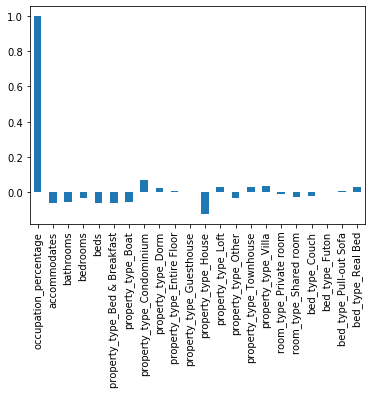

In [118]:
correlations["occupation_percentage"].plot.bar()

In [104]:
test_score

0.011276223789644657

In [105]:
train_score

0.04611726121849047

In [24]:
my_string = df.loc[0,"amenities"]

In [25]:
my_string

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

In [26]:
replacements = ['"',"'","{","}"]
for char in replacements:
    if char in my_string:
        my_string = my_string.replace(char,"")

In [29]:
my_string

'TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace'

In [28]:
my_string.split(",")

['TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace']

In [65]:
all_amenities = []
replacements = ['"',"'","{","}"]

for index, row in df.iterrows():
    amenities = row['amenities']
    for char in replacements:
        if char in amenities:
            amenities = amenities.replace(char,"")
            
    df.loc[index, 'amenities'] = amenities
    amenities = amenities.split(",")
    all_amenities += amenities

In [70]:
a = set(all_amenities)

In [71]:
a

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}

In [73]:
df.dtypes

property_type     object
room_type         object
accommodates       int64
bathrooms        float64
bedrooms         float64
beds             float64
bed_type          object
amenities         object
city              object
dtype: object